In [60]:
'''
arima = ARIMA(df2['Price'], order=(36,1,1))
ARIMA(p,q,d)
p期數對於預測的影響較小
q, d的數值增加，易造成預測偏差越大，預測的線段起伏也會越來越小，甚至趨近於平緩的斜直線
'''

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

dataset = yf.download("2379.TW", start="2000-01-01", end="2020-05-31")

dataset = dataset.reset_index()
df = dataset[['Date', 'Adj Close']].copy()
df.columns = ['Date', 'Price']
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df2 = df.resample('M').mean()



[*********************100%***********************]  1 of 1 completed


In [59]:
arima = ARIMA(df2['Price'], order=(36,1,6))
res_ar = arima.fit()
res_ar.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  245
Model:                ARIMA(36, 1, 6)   Log Likelihood                -780.819
Date:                Sun, 11 Jul 2021   AIC                           1647.637
Time:                        13:24:22   BIC                           1798.015
Sample:                    01-31-2000   HQIC                          1708.201
                         - 05-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2244     42.892      0.005      0.996     -83.842      84.291
ar.L2          0.5810     10.116      0.057      0.954     -19.246      20.408
ar.L3         -0.6516     24.112     -0.027      0.978     -47.910      46.606
ar.L4         -0.2915     28.532     -0.010      0.992     -56.214      55.631
ar.L5          0.6268     12.143      0.052      0.959     -23.172      24.426
ar.L6         -0.0582     26.633     -0.002      0.998     -52.258      52.142
ar.L7          0.2231      3.187      0.070      0.944      -6.024       6.470
ar.L8          0.0081      9.687      0.001      0.999     -18.978      18.994
ar.L9         -0.0948      0.371     -0.256      0.798      -0.821       0.632
ar.L10         0.1619      3.894      0.042      0.967      -7.471       7.795
ar.L11        -0.0485      7.173     -0.007      0.995     -14.107      14.010
ar.L12        -0.2276      2.173     -0.105      0.917      -4.486       4.031
ar.L13         0.1791      9.638      0.019      0.985     -18.711      19.069
ar.L14        -0.0425      7.864     -0.005      0.996     -15.456      15.371
ar.L15        -0.2698      2.016     -0.134      0.894      -4.221       3.681
ar.L16         0.0174     11.537      0.002      0.999     -22.594      22.629
ar.L17         0.3208      0.901      0.356      0.722      -1.446       2.087
ar.L18        -0.1016     13.589     -0.007      0.994     -26.736      26.533
ar.L19        -0.2482      4.607     -0.054      0.957      -9.278       8.781
ar.L20         0.4406     10.500      0.042      0.967     -20.140      21.021
ar.L21         0.1139     19.023      0.006      0.995     -37.170      37.398
ar.L22        -0.2316      4.600     -0.050      0.960      -9.248       8.785
ar.L23         0.0966      9.790      0.010      0.992     -19.092      19.285
ar.L24         0.1018      4.429      0.023      0.982      -8.580       8.783
ar.L25         0.0130      4.379      0.003      0.998      -8.571       8.597
ar.L26        -0.2181      0.666     -0.328      0.743      -1.523       1.087
ar.L27        -0.1313      9.280     -0.014      0.989     -18.321      18.058
ar.L28         0.3174      5.446      0.058      0.954     -10.356      10.991
ar.L29        -0.0990     13.631     -0.007      0.994     -26.815      26.617
ar.L30        -0.1331      4.535     -0.029      0.977      -9.021       8.755
ar.L31         0.1446      5.581      0.026      0.979     -10.794      11.083
ar.L32         0.0571      6.207      0.009      0.993     -12.109      12.223
ar.L33         0.0418      2.414      0.017      0.986      -4.689       4.773
ar.L34         0.1805      1.897      0.095      0.924      -3.537       3.898
ar.L35        -0.1503      7.681     -0.020      0.984     -15.204      14.903
ar.L36        -0.0091      6.449     -0.001      0.999     -12.648      12.630
ma.L1         -0.0552     42.896     -0.001      0.999     -84.130      84.020
ma.L2         -0.7195      2.987     -0.241      0.810      -6.574       5.135
ma

In [55]:
df2.index[-1]

Timestamp('2020-05-31 00:00:00', freq='M')

<AxesSubplot:xlabel='Date'>

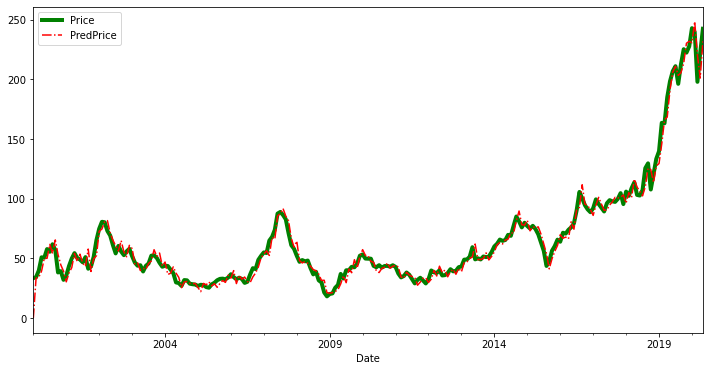

In [56]:
df2['PredPrice'] = res_ar.predict(df2.index[0], df2.index[-1])
df2['Price'].plot(figsize=(12, 6), color='green', linestyle='-', lw=4, legend='Price')
df2['PredPrice'].plot(figsize=(12, 6), color='red', linestyle='-.', legend='PredPrice')

<AxesSubplot:>

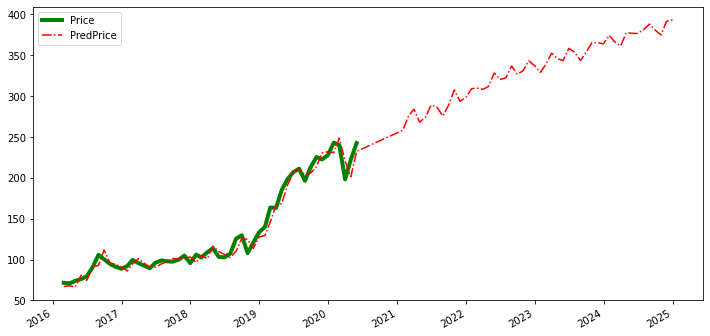

In [57]:
extended_df = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2021m1', length=48))
extended_df = df2.append(extended_df)
extended_df['PredPrice'] = res_ar.predict(extended_df.index[0], extended_df.index[-1])
extended_df['Price'].iloc[-100:].plot(figsize=(12, 6), color='green', linestyle='-', lw=4, legend='Price')
extended_df['PredPrice'].iloc[-100:].plot(figsize=(12, 6), color='red', linestyle='-.', legend='PredPrice')